# Ejercicios Pair Programming 
## Lección 3 - Tratamiento para ML de Covarianza y Correlación

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [42]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Establecer tamaño gráficas
plt.rcParams["figure.figsize"] = (15,15)

# Warning
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv("supermercado_limpio.csv", index_col=0)

In [44]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,1,4,6,1
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,1,7,7,5
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,1,3,5,2
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,1,1,2,7
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,2,3,2,7


1.- Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

La covarianza indica si ambas variables van en la misma dirección y la correlación aparte de lo que indica la covarianza también la fuerza de la relación, es decir, como están de correlacionadas dichas variables.

2.- Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

#### Analíticamente correlación

In [45]:
# Utilizamos el parametro .corr para ver la correlación de Pearson
df.corr()

,id,year_birth,income,kidhome,teenhome,recency,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth
id,1.000000,0.007097,0.003756,0.002540,-0.004278,-0.046291,-0.039894,-0.022925,-0.010541,-0.007458
year_birth,0.007097,1.000000,-0.211185,0.237567,-0.364587,-0.015375,-0.073426,-0.160004,-0.140854,0.121232
income,0.003756,-0.211185,1.000000,-0.534764,0.047663,0.008343,-0.133933,0.530235,0.690648,-0.654353
kidhome,0.002540,0.237567,-0.534764,1.000000,-0.039290,0.011257,0.225391,-0.382811,-0.509683,0.447688
teenhome,-0.004278,-0.364587,0.047663,-0.039290,1.000000,0.012190,0.397099,0.159858,0.049357,0.132721
recency,-0.046291,-0.015375,0.008343,0.011257,0.012190,1.000000,-0.000410,0.001425,-0.001048,-0.019005
numdealspurchases,-0.039894,-0.073426,-0.133933,0.225391,0.397099,-0.000410,1.000000,0.276862,0.070083,0.361608
numwebpurchases,-0.022925,-0.160004,0.530235,-0.382811,0.159858,0.001425,0.276862,1.000000,0.553461,-0.043326
numstorepurchases,-0.010541,-0.140854,0.690648,-0.509683,0.049357,-0.001048,0.070083,0.553461,1.000000,-0.455857
numwebvisitsmonth,-0.007458,0.121232,-0.654353,0.447688,0.132721,-0.019005,0.361608,-0.043326,-0.455857,1.000000


De forma analítica vemos la correlación de nuestras variables del dataset. En este caso, los valores de las correlaciones nos aparecen en una tabla que no se ve completa ya que hay bastantes columnas para correlacionar, por lo que haremos el análisis en base a la gráfica de heatmap que tendremos más adelante.

#### Analíticamente covarianza

In [46]:
df.cov()

,id,year_birth,income,kidhome,teenhome,recency,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth
id,1.055017e+07,269.746616,2.517569e+05,4.432753,-7.553918,-4346.264790,-244.316668,-195.655334,-110.846275,-58.357989
year_birth,2.697466e+02,136.948944,-5.100627e+04,1.493626,-2.319361,-5.201038,-1.620100,-4.919906,-5.336704,3.417615
income,2.517569e+05,-51006.266465,4.259521e+08,-5929.504360,534.744549,4977.007152,-5211.747162,28753.862093,46148.960516,-32532.657165
kidhome,4.432753e+00,1.493626,-5.929504e+03,0.288637,-0.011475,0.174819,0.228311,-0.540392,-0.886545,0.579400
teenhome,-7.553918e+00,-2.319361,5.347445e+02,-0.011475,0.295513,0.191554,0.407006,0.228333,0.086868,0.173801
recency,-4.346265e+03,-5.201038,4.977007e+03,0.174819,0.191554,835.549306,-0.022363,0.108239,-0.098069,-1.323335
numdealspurchases,-2.443167e+02,-1.620100,-5.211747e+03,0.228311,0.407006,-0.022363,3.554911,1.371594,0.427809,1.642402
numwebpurchases,-1.956553e+02,-4.919906,2.875386e+04,-0.540392,0.228333,0.108239,1.371594,6.903916,4.708251,-0.274234
numstorepurchases,-1.108463e+02,-5.336704,4.614896e+04,-0.886545,0.086868,-0.098069,0.427809,4.708251,10.482124,-3.555331
numwebvisitsmonth,-5.835799e+01,3.417615,-3.253266e+04,0.579400,0.173801,-1.323335,1.642402,-0.274234,-3.555331,5.803020


Aquí vemos de forma analítica la covarianza y podemos apreciar que en la relación de "numwebpurchases" y "numdealspurchases" visualizamos que el valor es "1.37", por lo tanto, es una covarianza positiva, es decir, si aumentan las ofertas en web también aumentan las compras online.

Por otro lado, la relación entre "numwebpurchases" y "year_birth" visualizamos en la tabla que es una covarianza negativa, es decir, cuanto mas mayor eres(tu año de nacimiento es inferior) más compras online haces.

3.- Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

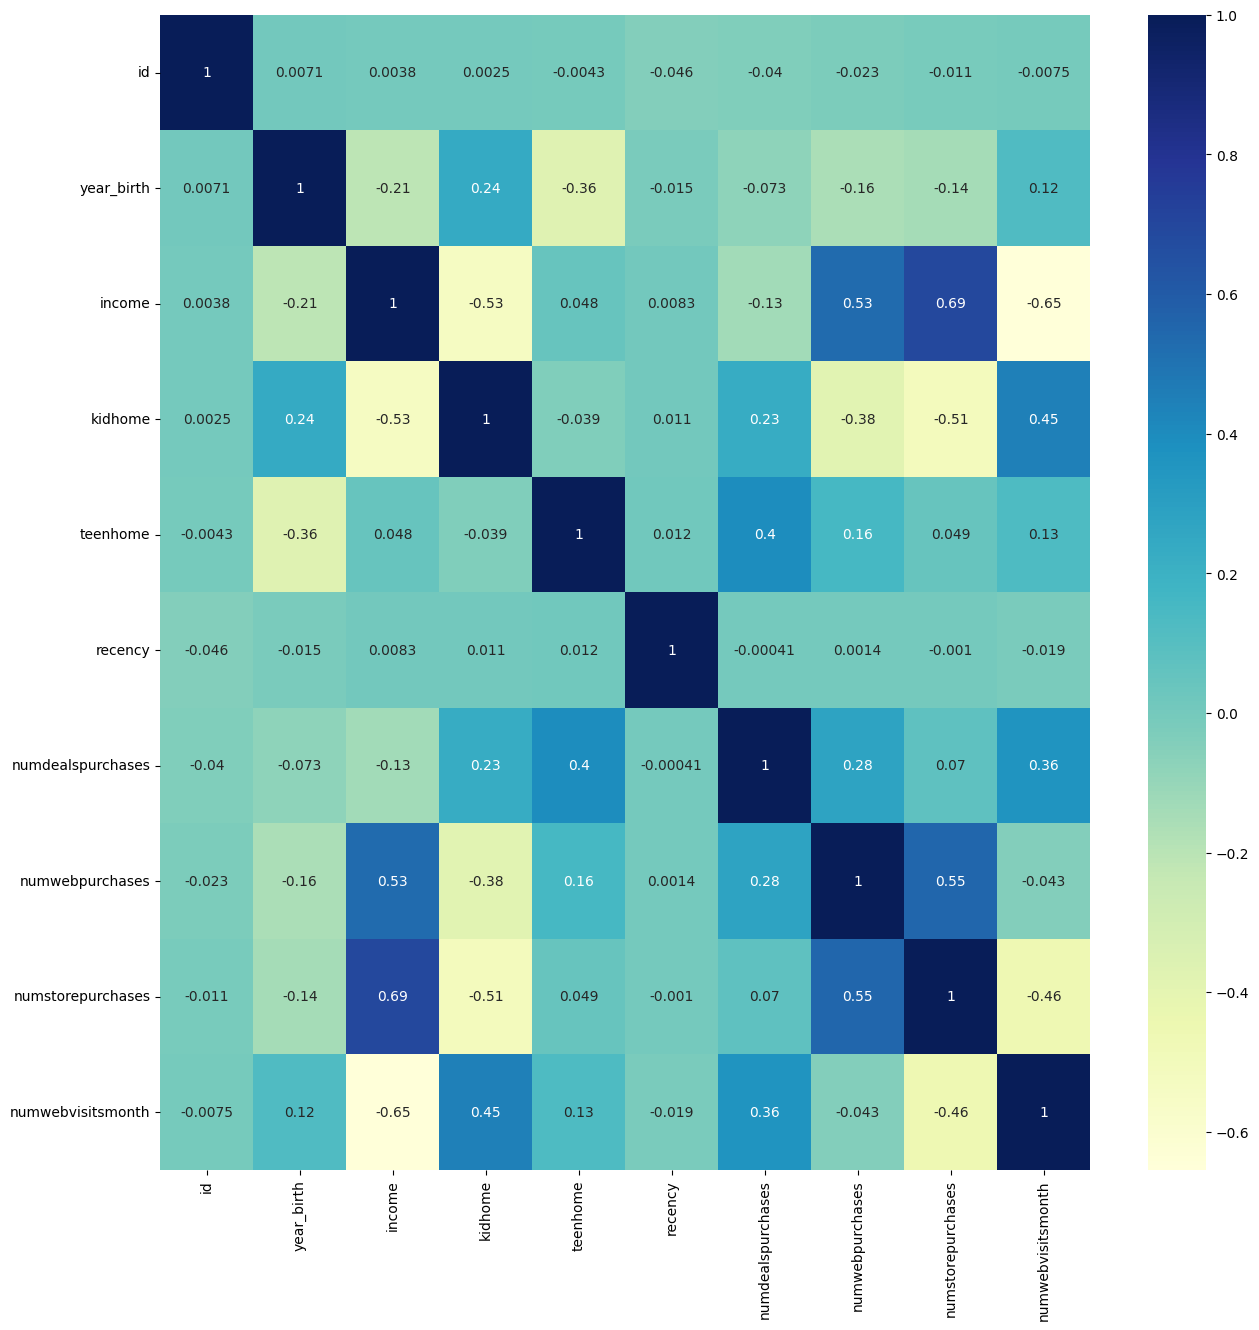

In [47]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True)
plt.savefig("./Gráficos/heatmap_supermercados.png");

Podemos ver aquí la correlación entre nuestras variables numéricas. Si vemos la relación entre "numwebpurchases y income" vemos que nos presenta el valor de 0.53, eso quiere decir que es una correlación positiva moderada, es decir, a más ingresos más compras por web. En el caso de "numwebpurchases y kid_home" vemos que presenta un valor de -0.38, eso quiere decir que es una correlacion negativa baja, es decir, a menor compras en web mayor número de hijos tienes en casa.

4.- Guardad la gráfica del heatmap.

La gráfica del heatmap la hemos añadido a una nueva carpeta llamada "Gráficos" donde la encontraréis.

Happy coding💪🏽